In [5]:
# import os

# # Specify the directory where you want to create new folders
# base_directory = r'C:\Users\Nilanjan Vyas\Documents\Minor_Project\Dataset'

# # Create 36 new folders
# for i in range(1, 37):
#     folder_name = f'folder_{i}'
#     folder_path = os.path.join(base_directory, folder_name)
    
#     # Check if the folder already exists, if not, create it
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)
#         print(f'Folder created: {folder_path}')
#     else:
#         print(f'Folder already exists: {folder_path}')

In [37]:
import os
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout
from keras.applications import VGG16
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [38]:
# Set the path to the directory containing the character folders
train_data_dir = r'C:\Users\Nilanjan Vyas\Documents\Minor_Project\Dataset\Train'
test_data_dir = r'C:\Users\Nilanjan Vyas\Documents\Minor_Project\Dataset\Test'

In [10]:
# # Load the custom model from the .h5 file
# model = load_model(r'C:\Users\Nilanjan Vyas\Documents\Minor_Project/transfer_saved.h5')

In [12]:
# # Compile the model if needed (you can skip this if the model is already compiled in the saved .h5 file)
# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(learning_rate=0.0001),
#               metrics=['accuracy'])



In [39]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout,Conv2D,MaxPooling2D,Input
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define your own custom model
input_layer = Input(shape=(32, 32, 3))

# Convolutional layers and max pooling
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
max_pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu')(max_pool1)
max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu')(max_pool2)
max_pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# Flatten and fully connected layers
flatten_layer = Flatten()(max_pool3)
dense1 = Dense(256, activation='relu')(flatten_layer)

# Output layer
output_layer = Dense(36, activation='softmax')(dense1)  # Assuming 36 classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
# model.load_weights(r'C:\Users\Nilanjan Vyas\Documents\Minor_Project/custom_cnn_weights.h5')

# Compile the model


In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
model.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         Y          
                                                                            
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       Y          
                                                                            
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         Y          
 2D)                                                                        
                                                                            
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     Y          
                                                                            
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         Y          
 2D)                                                       

In [42]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)  # Splitting 20% of the data as validation set

# Load and split the data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')  # Use subset parameter to specify training data

Found 7289 images belonging to 36 classes.


In [43]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=100,
    verbose=1)  # Number of validation samples // batch_size

# Evaluate the model on test data


Epoch 1/100
227/227 [==============================] - 57s 249ms/step - loss: 3.5294 - accuracy: 0.0402
Epoch 2/100
227/227 [==============================] - 13s 56ms/step - loss: 2.8085 - accuracy: 0.2128
Epoch 3/100
227/227 [==============================] - 13s 56ms/step - loss: 2.0817 - accuracy: 0.4077
Epoch 4/100
227/227 [==============================] - 12s 54ms/step - loss: 1.6257 - accuracy: 0.5353
Epoch 5/100
227/227 [==============================] - 12s 55ms/step - loss: 1.3263 - accuracy: 0.6136
Epoch 6/100
227/227 [==============================] - 12s 52ms/step - loss: 1.1332 - accuracy: 0.6624
Epoch 7/100
227/227 [==============================] - 12s 52ms/step - loss: 0.9498 - accuracy: 0.7229
Epoch 8/100
227/227 [==============================] - 12s 53ms/step - loss: 0.8463 - accuracy: 0.7469
Epoch 9/100
227/227 [==============================] - 12s 53ms/step - loss: 0.7298 - accuracy: 0.7850
Epoch 10/100
227/227 [==============================] - 12s 52ms/step - 

227/227 [==============================] - 11s 50ms/step - loss: 0.0882 - accuracy: 0.9719
Epoch 80/100
227/227 [==============================] - 16s 68ms/step - loss: 0.0769 - accuracy: 0.9738
Epoch 81/100
227/227 [==============================] - 60s 264ms/step - loss: 0.0747 - accuracy: 0.9764
Epoch 82/100
227/227 [==============================] - 13s 58ms/step - loss: 0.0799 - accuracy: 0.9746
Epoch 83/100
227/227 [==============================] - 11s 47ms/step - loss: 0.0887 - accuracy: 0.9718
Epoch 84/100
227/227 [==============================] - 11s 46ms/step - loss: 0.0516 - accuracy: 0.9839
Epoch 85/100
227/227 [==============================] - 12s 51ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 86/100
227/227 [==============================] - 12s 51ms/step - loss: 0.0863 - accuracy: 0.9724
Epoch 87/100
227/227 [==============================] - 13s 55ms/step - loss: 0.0728 - accuracy: 0.9756
Epoch 88/100
227/227 [==============================] - 12s 55ms/step - loss

In [44]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # Important: Do not shuffle the test data

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 1339 images belonging to 36 classes.
42/42 [==============================] - 9s 217ms/step - loss: 1.2923 - accuracy: 0.8566
Test Accuracy: 85.66%


In [45]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
print(len(predicted_classes))

# Get true labels
true_labels = test_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_classes)

print('Confusion Matrix:')
print(confusion_mtx)

42/42 [==============================] - 1s 24ms/step
1339
Confusion Matrix:
[[26  0  0 ...  0  3  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 27]]


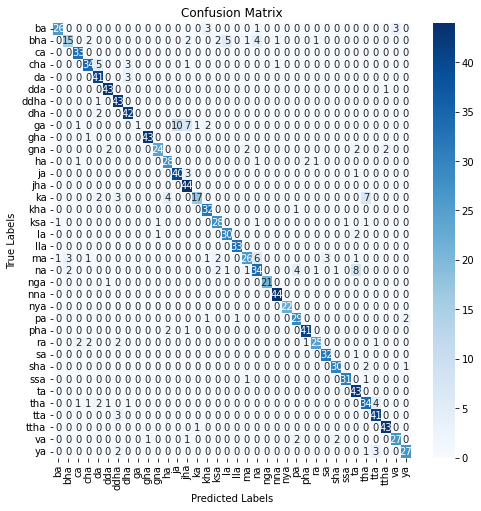

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your previous code for predicting and computing confusion matrix) ...

# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')  # 'micro', 'macro', or 'weighted' 
recall = recall_score(true_labels, predicted_classes, average='weighted')  # 'micro', 'macro', or 'weighted' 
f1 = f1_score(true_labels, predicted_classes, average='weighted')  # 'micro', 'macro', or 'weighted' 

# Print the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


Accuracy: 85.66%
Precision: 86.20%
Recall: 85.66%
F1 Score: 84.61%


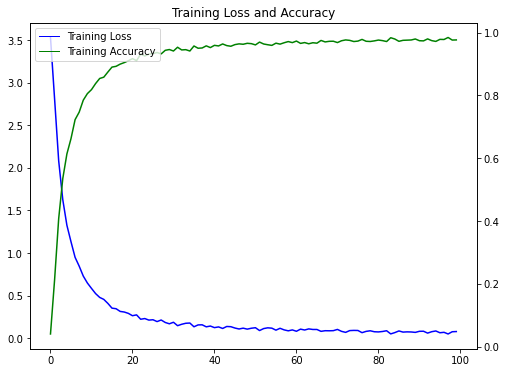

In [70]:
plt.figure(figsize=(8, 6))

# Plot training loss with legend
loss_line = plt.Line2D([0], [0], color='blue', linewidth=1, linestyle='-', label='Training Loss')
plt.plot(history.history['loss'], color='blue')

# Create a twin Axes sharing the xaxis for accuracy
ax2 = plt.gca().twinx()
accuracy_line = plt.Line2D([0], [0], color='green', linewidth=1, linestyle='-', label='Training Accuracy')
ax2.plot(history.history['accuracy'], color='green')

# Legends for both loss and accuracy
lines = [loss_line, accuracy_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.xlabel('Epoch')
plt.title('Training Loss and Accuracy')
plt.show()